In [32]:
pip install setuptools


Note: you may need to restart the kernel to use updated packages.


In [22]:

pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [17]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

# 1.Reading Data

In [137]:
data = pd.read_csv(r"c:\Users\skynet\AppData\Local\Temp\Rar$DRa20252.28087\data.csv" ,  delimiter=',')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [139]:
data.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [140]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [154]:
data.columns

Index(['Enc_Unnamed: 32', 'Enc_Enc_id', 'Enc_Enc_diagnosis',
       'Enc_Enc_radius_mean', 'Enc_Enc_texture_mean', 'Enc_Enc_perimeter_mean',
       'Enc_Enc_area_mean', 'Enc_Enc_smoothness_mean',
       'Enc_Enc_compactness_mean', 'Enc_Enc_concavity_mean',
       'Enc_Enc_concave points_mean', 'Enc_Enc_symmetry_mean',
       'Enc_Enc_fractal_dimension_mean', 'Enc_Enc_radius_se',
       'Enc_Enc_texture_se', 'Enc_Enc_perimeter_se', 'Enc_Enc_area_se',
       'Enc_Enc_smoothness_se', 'Enc_Enc_compactness_se',
       'Enc_Enc_concavity_se', 'Enc_Enc_concave points_se',
       'Enc_Enc_symmetry_se', 'Enc_Enc_fractal_dimension_se',
       'Enc_Enc_radius_worst', 'Enc_Enc_texture_worst',
       'Enc_Enc_perimeter_worst', 'Enc_Enc_area_worst',
       'Enc_Enc_smoothness_worst', 'Enc_Enc_compactness_worst',
       'Enc_Enc_concavity_worst', 'Enc_Enc_concave points_worst',
       'Enc_Enc_symmetry_worst', 'Enc_Enc_fractal_dimension_worst'],
      dtype='object')

# 2.Convert categorical to numerical

In [151]:
categoricalcolumns = ['Unnamed: 32', 'Enc_id', 'Enc_diagnosis', 'Enc_radius_mean',
       'Enc_texture_mean', 'Enc_perimeter_mean', 'Enc_area_mean',
       'Enc_smoothness_mean', 'Enc_compactness_mean', 'Enc_concavity_mean',
       'Enc_concave points_mean', 'Enc_symmetry_mean',
       'Enc_fractal_dimension_mean', 'Enc_radius_se', 'Enc_texture_se',
       'Enc_perimeter_se', 'Enc_area_se', 'Enc_smoothness_se',
       'Enc_compactness_se', 'Enc_concavity_se', 'Enc_concave points_se',
       'Enc_symmetry_se', 'Enc_fractal_dimension_se', 'Enc_radius_worst',
       'Enc_texture_worst', 'Enc_perimeter_worst', 'Enc_area_worst',
       'Enc_smoothness_worst', 'Enc_compactness_worst', 'Enc_concavity_worst',
       'Enc_concave points_worst', 'Enc_symmetry_worst',
       'Enc_fractal_dimension_worst' ]
for i in categoricalcolumns :
    dict = {i:j for i,j in zip(data[i].unique(),range(data[i].nunique())) }
    data[f'Enc_{i}'] = data[i].map(dict)
    data.drop([i] , axis= 1 , inplace=True)

In [143]:
data.dtypes

Unnamed: 32                    float64
Enc_id                           int64
Enc_diagnosis                    int64
Enc_radius_mean                  int64
Enc_texture_mean                 int64
Enc_perimeter_mean               int64
Enc_area_mean                    int64
Enc_smoothness_mean              int64
Enc_compactness_mean             int64
Enc_concavity_mean               int64
Enc_concave points_mean          int64
Enc_symmetry_mean                int64
Enc_fractal_dimension_mean       int64
Enc_radius_se                    int64
Enc_texture_se                   int64
Enc_perimeter_se                 int64
Enc_area_se                      int64
Enc_smoothness_se                int64
Enc_compactness_se               int64
Enc_concavity_se                 int64
Enc_concave points_se            int64
Enc_symmetry_se                  int64
Enc_fractal_dimension_se         int64
Enc_radius_worst                 int64
Enc_texture_worst                int64
Enc_perimeter_worst      

In [144]:
import tensorflow as tf

In [145]:
import keras

# Building NN

In [161]:
from tensorflow import keras

keras_model = keras.models.Sequential([
    keras.layers.Dense(8, input_shape=(14,), activation='relu'),  
    keras.layers.Dense(64, activation='relu'),   
    keras.layers.Dense(1, activation='sigmoid') 
])

keras_model.summary()


c:\Users\skynet\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,593 (37.47 KB)

 Trainable params: 9,593 (37.47 KB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [163]:

X = data.drop(columns=['Enc_Enc_diagnosis']) 
y = data['Enc_Enc_diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = keras_model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.1)





c:\Users\skynet\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6278 - loss: 0.6897 - val_accuracy: 0.6731 - val_loss: 0.6780
Epoch 2/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5877 - loss: 0.6851 - val_accuracy: 0.6731 - val_loss: 0.6676
Epoch 3/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6056 - loss: 0.6782 - val_accuracy: 0.6731 - val_loss: 0.6599
Epoch 4/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6500 - loss: 0.6642 - val_accuracy: 0.6731 - val_loss: 0.6550
Epoch 5/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6090 - loss: 0.6725 - val_accuracy: 0.6731 - val_loss: 0.6515
Epoch 6/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6099 - loss: 0.6709 - val_accuracy: 0.6731 - val_loss: 0.6486
Epoch 7/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5753 - loss: 0.6820 - val_accuracy: 0.6731 - val_loss: 0.6462
Epoch 8/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6556 - loss: 0.6526 - val_accu

# saving Model

In [164]:
keras_model.save('airquality.keras')

In [167]:

y_pred = keras_model.predict(X_test)


print(y_pred[:10])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.6125956]
 [0.6125956]
 [0.6125956]
 [0.6125956]
 [0.6125956]
 [0.6125956]
 [0.6125956]
 [0.6125956]
 [0.6125956]
 [0.6125956]]


#   Evaluate Model



In [166]:

loss, accuracy = keras_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6762 - loss: 0.6384 
Loss: 0.6267170906066895
Accuracy: 0.7017543911933899


# visualizing Result


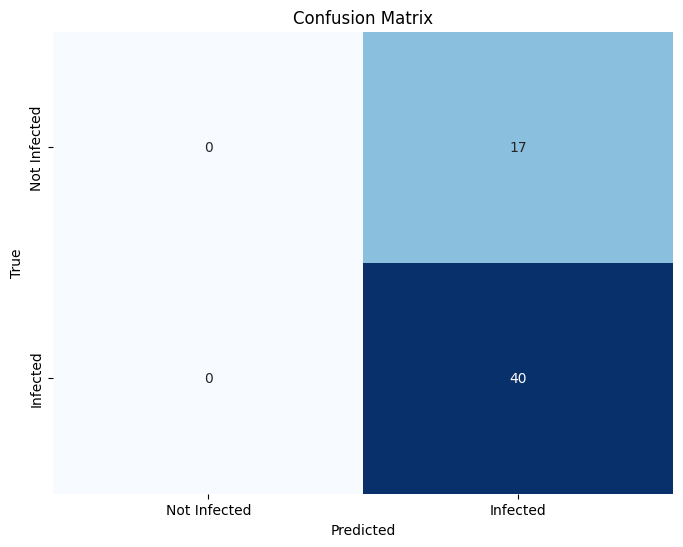

In [176]:

y_pred_binary = (y_pred > 0.5).astype(int) 


cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Infected', 'Infected'], yticklabels=['Not Infected', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
